In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd

#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *

import pickle 

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import csv

In [2]:
# load dataset
test_dataset = pd.read_csv ("CSV_files/test_data.csv")
print("Dataset has {} rows and {} Columns".format(test_dataset.shape[0],test_dataset.shape[1])) 

Dataset has 4 rows and 2 Columns


y_predict value for 6.5 is  [0.01158103]

 Accuracy train by acc_r2 65.29694931296974

 Accuracy train by mean_ab 88.74837130648795


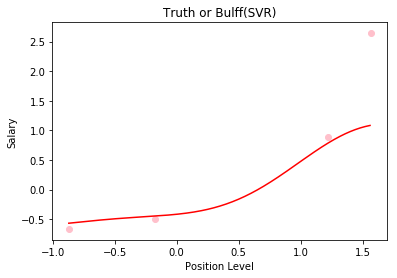

In [11]:
class Testing():
           
    def y_prediction(self,regression, x_test):
        # predicting the test set result
        y_predict = regression.predict(x_test.reshape(-1,1))
        print("y_predict value for 6.5 is ", regression.predict(np.array(6.5).reshape(-1,1)))
        return y_predict
        
#         # predicting the test set result
#         return regression.predict(x_train)
    
    def accuracy(self,y_predict,y_test):
        # acc using r2
        acc_r2 = r2_score(y_test, y_predict)*100
#         acc_r2 = (1-error)*100
            
        total_error = mean_absolute_error(y_test, y_predict)
        mean_ab = ( 1 - total_error/ len(y_test)) *100
    
        # using median_ab_error
        median_ab_error = median_absolute_error(y_test, y_predict)
        
        return acc_r2,mean_ab,median_ab_error
    
    def visualization(self,x_test,y_test, regressor):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        x_grid = np.arange(min(x_test), max(x_test), 0.01)
        x_grid = x_grid.reshape((len(x_grid),1))

        plt.scatter(x_test,y_test, color = 'pink')
        plt.plot(x_grid, regressor.predict(x_grid), color = 'red')
        plt.title("Truth or Bulff(SVR)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        


def main():
    #class obj created
    obj  = Testing()
    
    # seperate fetures and label
    x_test = test_dataset.iloc[:,:-1].values
    y_test = test_dataset.iloc[:,1].values
 
       #cross validation
    file1 = open('SupportVectorReg.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction 
    y_pre = obj.y_prediction(reg1, x_test)
#     print("\n\n y_prediction:",y_cv_pre)
    
    acc_r2,mean_ab,median_ab_error= obj.accuracy(y_pre,y_test)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by mean_ab", mean_ab)
#     print("\n Accuracy train by median_ab_error", median_ab_error)

    obj.visualization(x_test, y_test, reg1)

if __name__ == '__main__':
    main()
